# Lab 1

**РОЗРОБЛЕННЯ ТА НАВЧАННЯ БАГАТОШАРОВОЇ НЕЙРОННОЇ МЕРЕЖІ**

In [425]:
import joblib
import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load Dataset

[Diamond Price Prediction](https://kaggle.com/code/karnikakapoor/diamond-price-prediction/notebook) dataset from Kaggle

In [426]:
df = pd.read_csv('diamonds.csv')
df

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Get basic info

In [427]:
df.describe()

,id,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Check empty values

In [428]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Remove 0-dimension diamonds

In [429]:
df = df.drop(df[df["x"] == 0].index)
df = df.drop(df[df["y"] == 0].index)
df = df.drop(df[df["z"] == 0].index)

Pick numeric features

In [430]:
numeric_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

Visualize numeric distributions

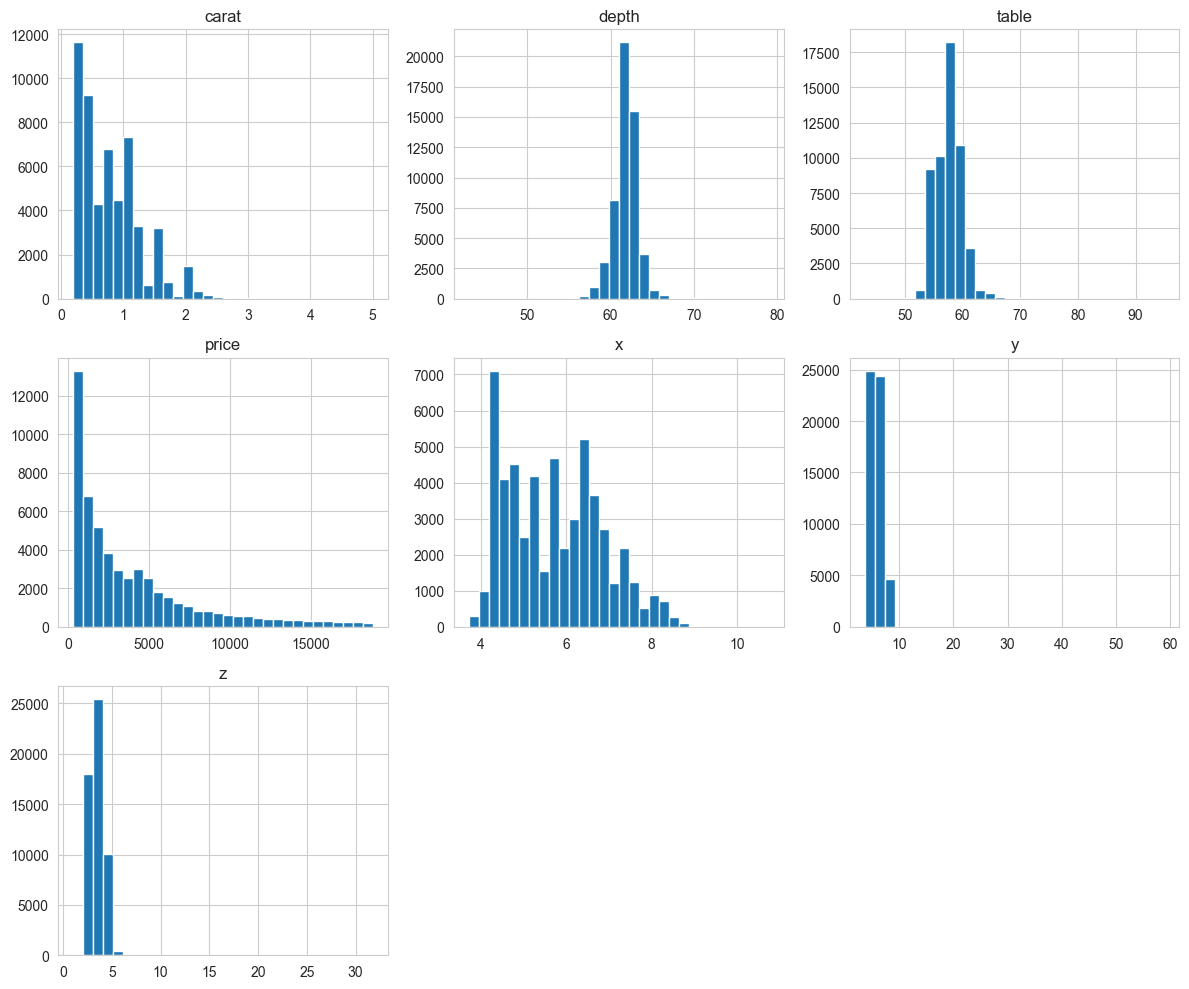

In [431]:
df[numeric_features].hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

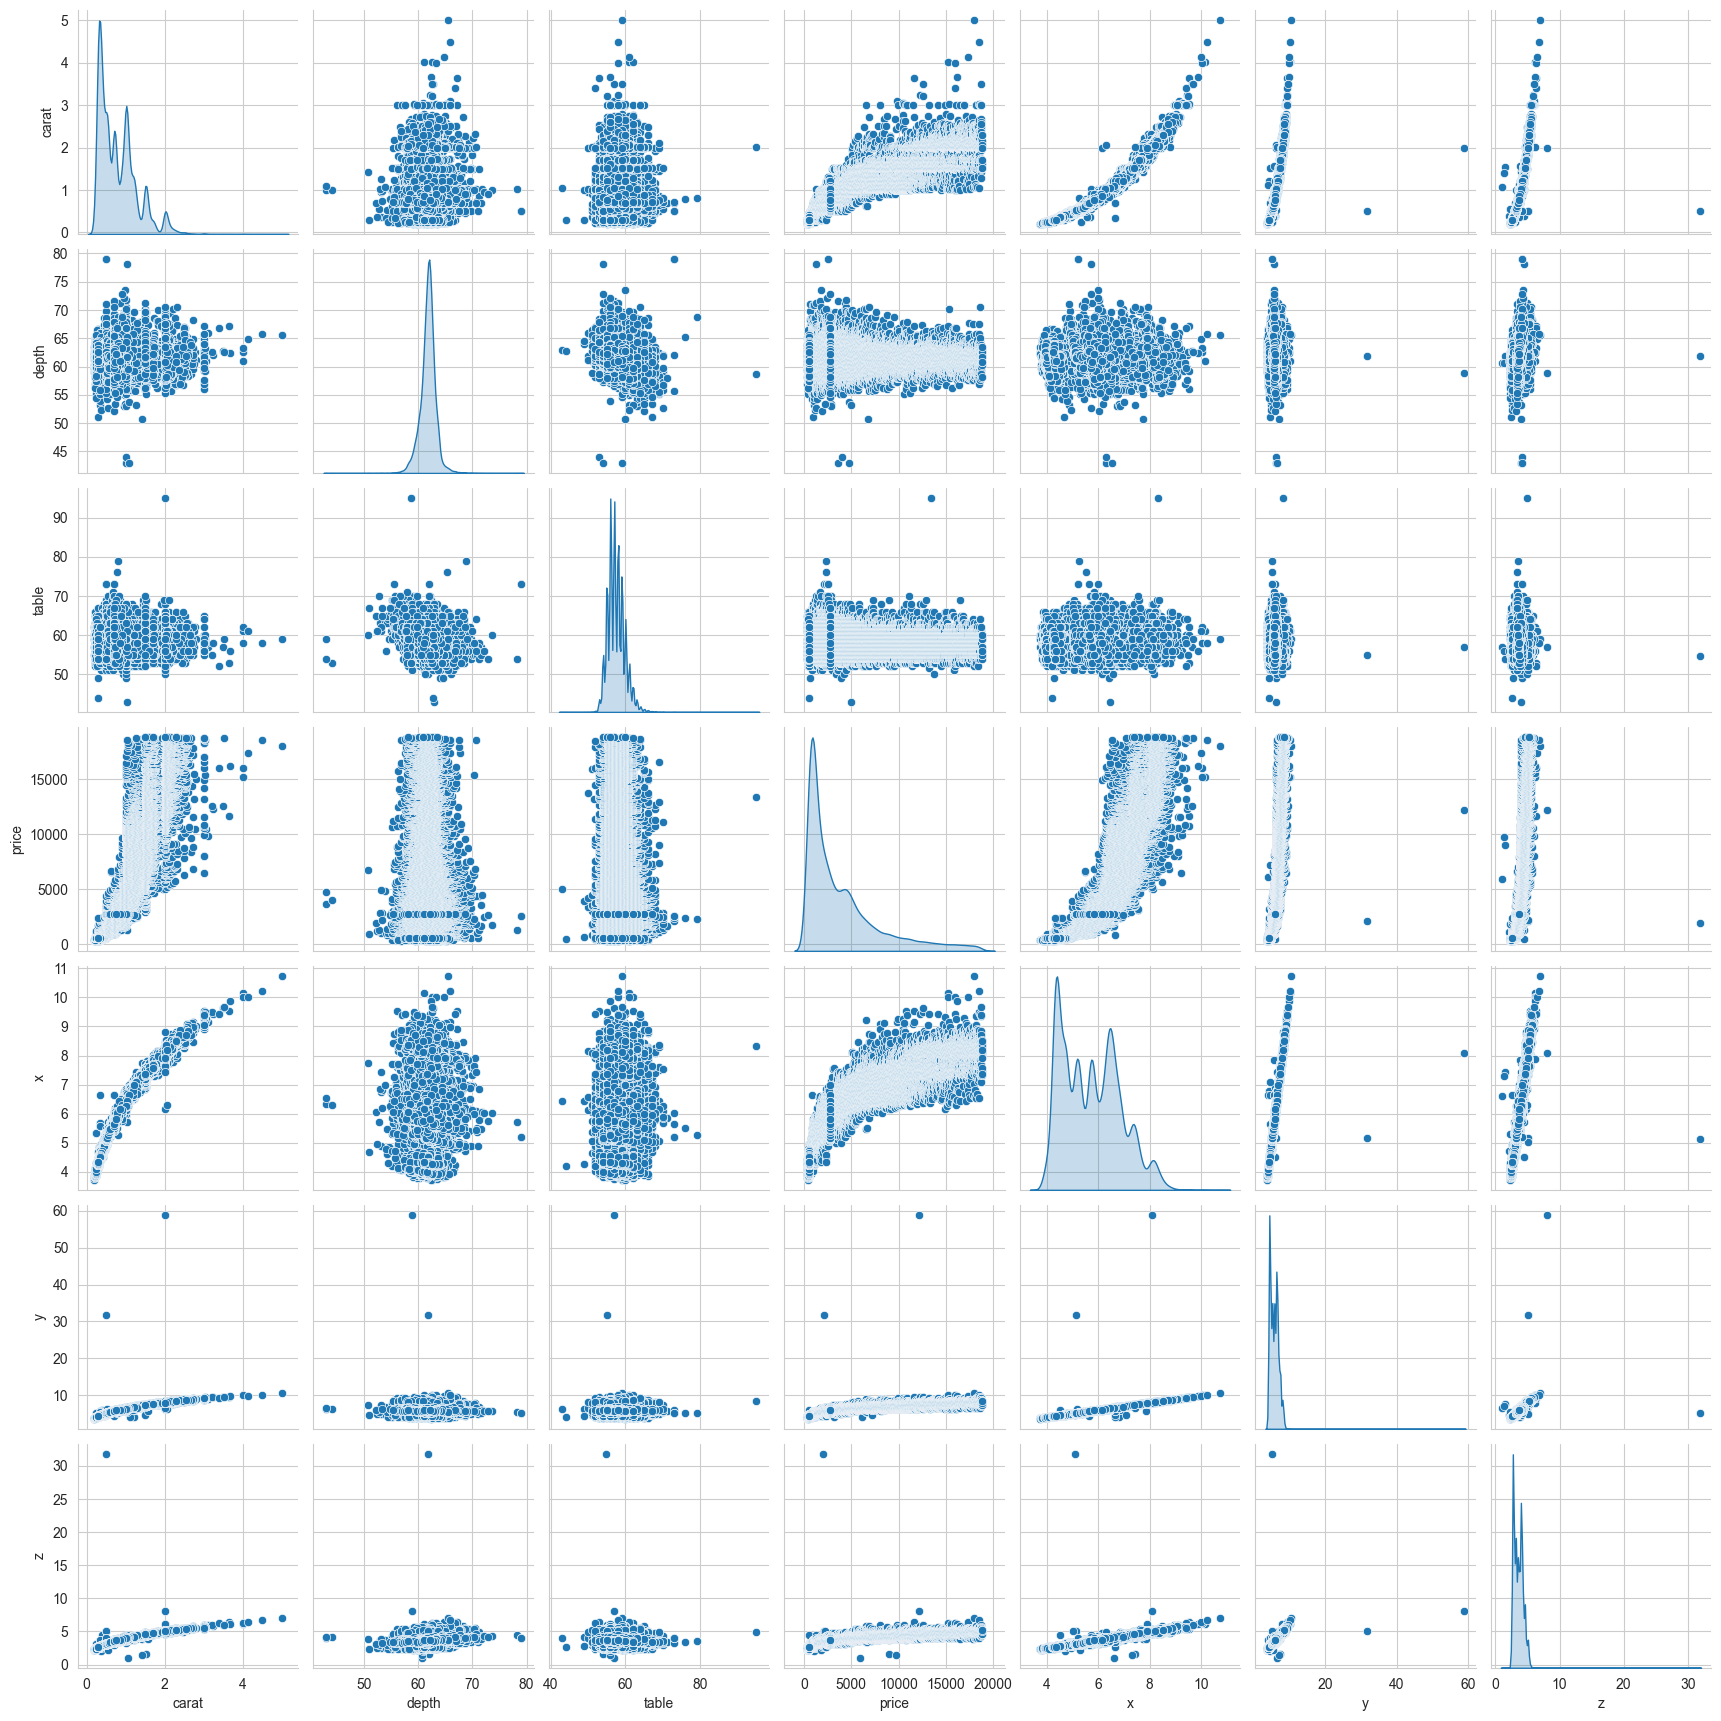

In [432]:
sns.pairplot(
    df[numeric_features],
    kind="scatter",
    diag_kind='kde',
)
plt.show()

Slice 95% quantile

In [433]:
for f in numeric_features:
    q = df[f].quantile(0.95)
    df = df[df[f] <= q]

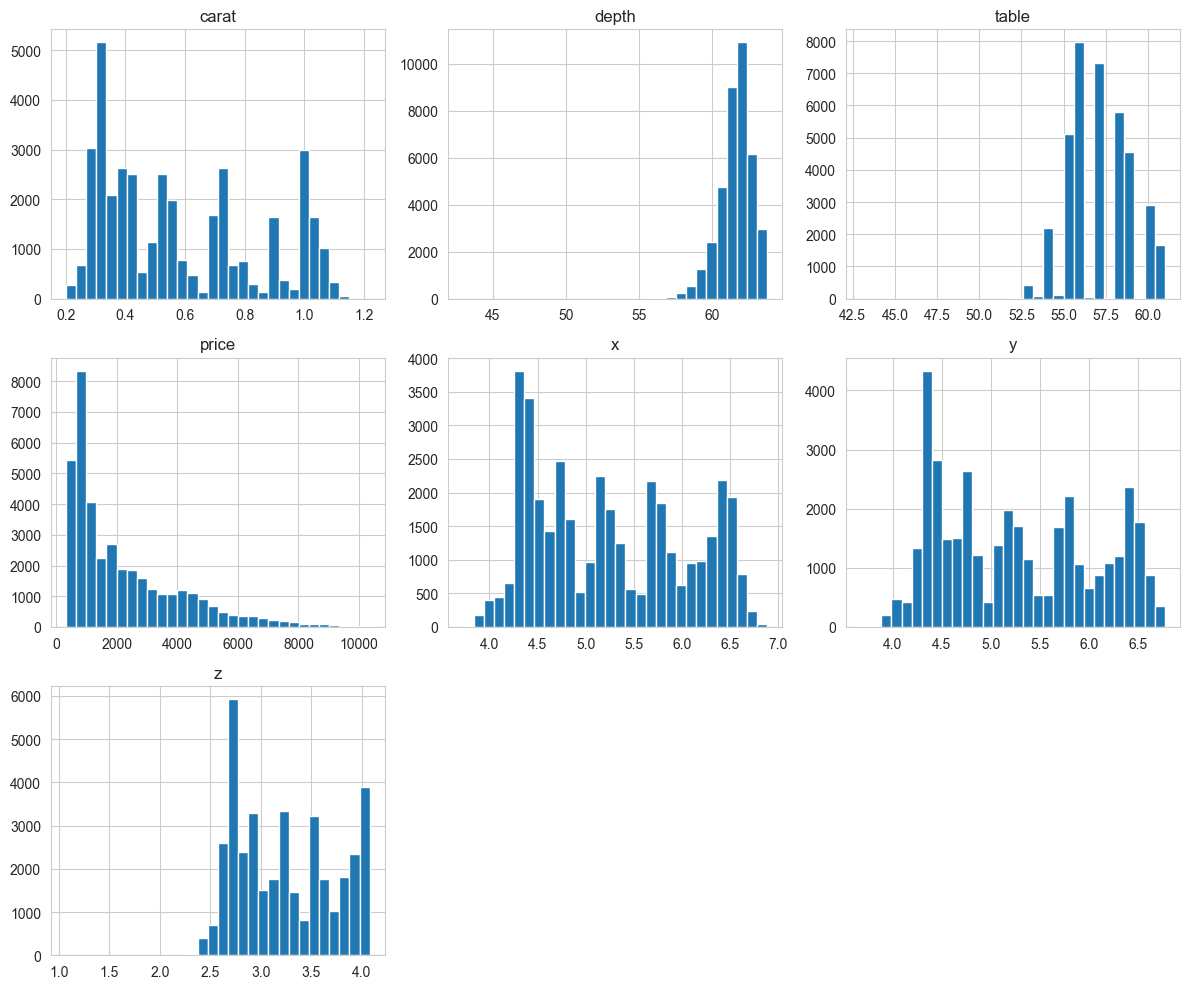

In [434]:
df[numeric_features].hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

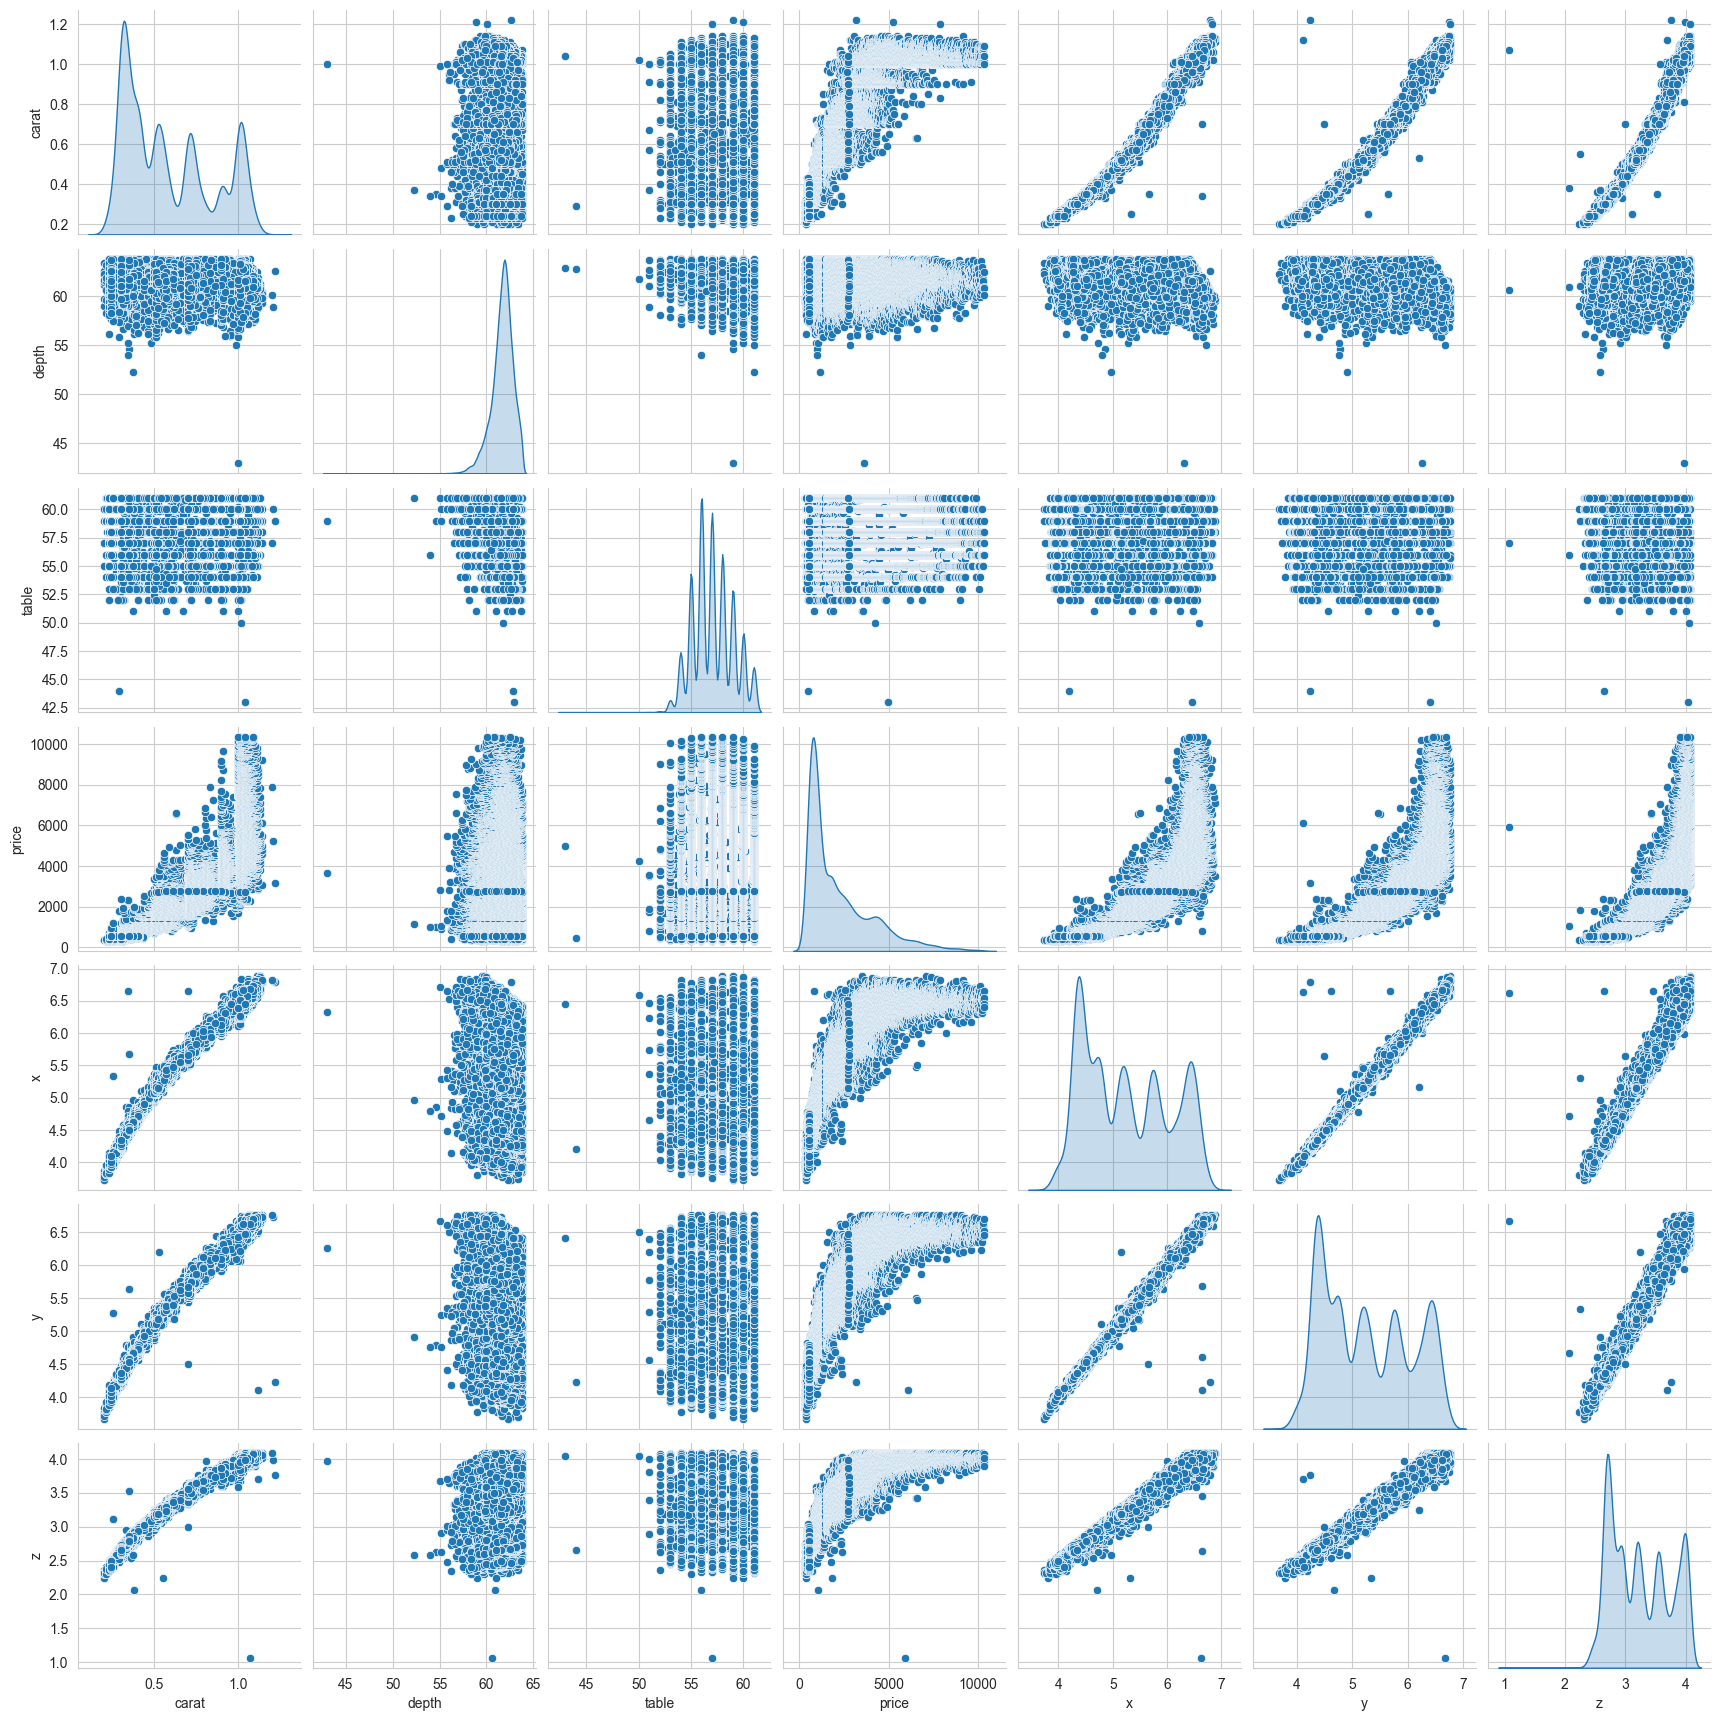

In [435]:
sns.pairplot(
    df[numeric_features],
    kind="scatter",
    diag_kind='kde',
)
plt.show()

## Feature Engineering

Check feature correlation

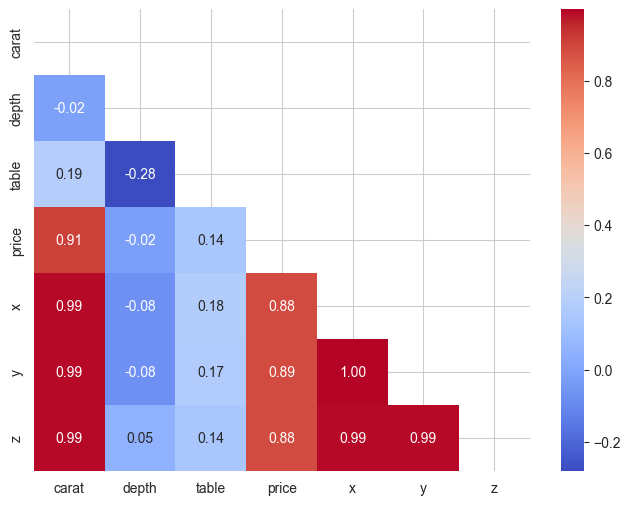

In [436]:
df_corr = df[numeric_features].corr()

# Source: https://kaggle.com/discussions/general/223072
mask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(
    df_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    mask=mask,
)
plt.show()

Select required features

In [437]:
X = df[['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']].copy()
y = df['price']

Convert categorical features

In [438]:
X = pd.get_dummies(X, columns=['cut'], dtype='int')
X = pd.get_dummies(X, columns=['color'], dtype='int')
X = pd.get_dummies(X, columns=['clarity'], dtype='int')

Standardize  numerical features to improve model training

In [439]:
X_numeric_features = ['carat', 'x', 'y', 'z']
scaler = StandardScaler()
X[X_numeric_features] = scaler.fit_transform(X[X_numeric_features])
X

,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.350325,-1.650601,-1.628538,-1.672612,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.426587,-1.726755,-1.806913,-1.920522,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.121539,-1.333296,-1.310010,-1.259428,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.045277,-1.155604,-1.157116,-1.011518,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5,-1.312194,-1.663293,-1.654020,-1.569316,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.518092,0.634000,0.639381,0.537921,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.518092,0.557847,0.626640,0.765173,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53937,0.441830,0.519770,0.537452,0.661877,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
53938,1.051926,1.141689,1.098061,1.033742,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Model Training

Prepare training data

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build a neural network

In [485]:
input_dim = X_train.shape[1]

model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

# model = keras.Sequential([
#     layers.Input(shape=(input_dim,)),
#     layers.Dense(192, activation='relu'),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(1),
# ])

# model = keras.Sequential([
#     layers.Input(shape=(input_dim,)),
#     layers.Dense(192, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(0.2),
#     layers.Dense(128, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(0.2),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(1),
# ])

# Compile the model with optimizer and loss function
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)               │ (None, 128)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

Train the network

In [486]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=250,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/250
959/959 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2063435.2500 - mae: 786.0084 - val_loss: 305336.2188 - val_mae: 331.8685
Epoch 2/250
959/959 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 241399.0000 - mae: 302.2766 - val_loss: 201963.3125 - val_mae: 280.7592
Epoch 3/250
959/959 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 170648.3281 - mae: 257.1045 - val_loss: 146328.6719 - val_mae: 240.0483
Epoch 4/250
959/959 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 126822.3438 - mae: 219.4479 - val_loss: 116178.5156 - val_mae: 216.0943
Epoch 5/250
959/959 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 101430.3438 - mae: 196.9187 - val_loss: 91767.8516 - val_mae: 190.0447
Epoch 6/250
959/959 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 87500.8047 - mae: 183.6781 - val_loss: 81726.1406 - val_mae: 179.4901
Epoch 7/250
959/959 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 79796.0938 - mae: 175.9673 - val_loss: 75978.2734 - val_mae: 173.3585
Epoch 8/250
959/959 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 74981.6406 -

## Evaluate

Check model performance

In [487]:
mse, mae = model.evaluate(X_test, y_test, verbose=1)
rmse = np.sqrt(mse)
print(f"Test MAE: {mae:.2f}, RMSE: {rmse:.2f}")

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55897.9375 - mae: 138.5527
Test MAE: 138.55, RMSE: 236.43


Plot training history

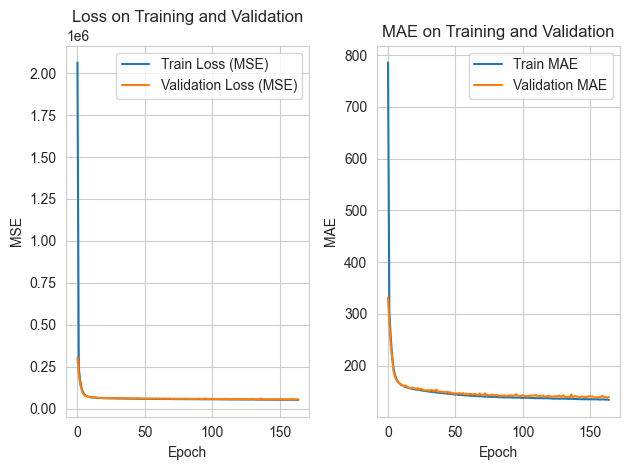

In [488]:
# Plot MSE loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss on Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE on Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

Calculate R² score

In [489]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² on test set: {r2:.4f}")

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
R² on test set: 0.9839


## Predict

In [490]:
new_data = pd.DataFrame({
    'carat': [0.83, 0.28, 0.38, 0.33, 0.5],
    'cut': ["Ideal", "Very Good", "Premium", "Premium", "Premium"],
    'color': ["H", "H", "H", "G", "G"],
    'clarity': ["SI2", "VVS1", "VVS2", "VS1", "VS1"],
    'x': [6.08, 4.27, 4.62, 4.42, 5.23],
    'y': [6.05, 4.31, 4.64, 4.39, 5.09],
    'z': [3.68, 2.51, 2.87, 2.74, 3.14],
})
# One-hot encoding of categorical variables
new_data = pd.get_dummies(new_data, columns=['cut', 'color', 'clarity'])
# Add missing columns that exist in X_train but not in new_data
for col in X_train.columns:
    if col not in new_data.columns:
        new_data[col] = 0
# Reorder columns to match training data
new_data = new_data[X_train.columns]
# Normalize numeric features (using the same scaler from training)
new_data[X_numeric_features] = scaler.transform(new_data[X_numeric_features])
# Make prediction
predicted_prices = model.predict(new_data)

print(f"Actual prices: [2200, 480, 833, 854, 1746]")
print(f"Predicted prices: {predicted_prices.transpose()[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Actual prices: [2200, 480, 833, 854, 1746]
Predicted prices: [2685.1035   533.3607   875.3614   822.13385 1721.5388 ]


## Save Model

Save the trained model

In [491]:
model.save("diamonds.keras")

Save the scaler used for normalization

In [492]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']